# Tarea 2 

La presente rutina es capaz de generar dos curvas, la primera corresponde a una curva limpia a elegir por el usuario entre 3 posibles tipos: diente de sierra,
cuadrada y senoidal. Por su parte, la segunda corresponde a la primera curva, pero con una componente de ruido agregada, la cual, puede ser escogida por el usuario entre 3 posibles niveles: baja, media y alto.

In [27]:
import matplotlib.pyplot as plt #Se importa la librería matplotlib para lo que es el trazado de curvas.

import numpy as np #Se importa la libreria numpy para realizar operaciones matemáticas complejas.

from scipy import signal #Se importa la librería scipy para el manejo de señales complejas.


Para llamar la función se debe colocar el nombre Tarea2 y dos parámetros.

El primer parámetro consiste en el tipo de onda y posee 3 opciones:
1. Onda Senoidal:

    ![cuadrada](https://www.disca.upv.es/adomenec/IASPA/tema5/mates/FormaSin.png)

2. Onda Cuadrada

    ![cuadrada](https://www.disca.upv.es/adomenec/IASPA/tema5/mates/formaRectangle.png)


3. Onda Diente de Sierra

    ![cuadrada](https://www.disca.upv.es/adomenec/IASPA/tema5/mates/formaSierra.png)

El segundo parámetro consiste en el nivel de distorsión que se busca y posee 3 opciones:
1. Ruido bajo

    Acá se usa un parámetro de SNR en dB = 30

2. Ruido medio

    Acá se usa un parámetro de SNR en dB = 15

3. Ruido alto

    Acá se usa un parámetro de SNR en dB = 5

El método empleado para generar el ruido en las funciones es el de Additive White Gaussian Noise (AWGN). Para modelar AWGN, se necesita agregar una variable aleatoria gaussiana de media cero a su señal original. La varianza de esa variable aleatoria afectará la potencia de ruido promedio. Esto según las ecuaciones:

$$ SNR = Pseñal/Pruido $$

$$ SNRdB = PseñaldB-PruidodB $$

En términos estadísticos, para una variable aleatoria gaussiana X, la potencia promedio es:

$$ E[X^2] = μ^2+σ^2. $$
 
 Pero, para el ruido blanco, μ=0 por lo que solo se usa la varianza. 


In [28]:
def Tarea2 (Tipo_de_onda, Nivel_de_ruido):
    if Tipo_de_onda == 1:
        t = np.linspace(1, 100, 1000, endpoint = True)
        x = np.sin(t/(2*np.pi))
        plt.plot(t, x)
        plt.title('Señal Senoidal')
        plt.ylabel('Amplitud')
        plt.xlabel('Tiempo')
        plt.show()

        if Nivel_de_ruido == 1:
            x_watts = x ** 2
            SNR_dB = 30 # Determinar un objetivo de SNR 
            Señal_Promedio_Watts = np.mean(x_watts) # Calcular señal y convertir a decibeles
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts) 
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB # Calcular el ruido y convertir a Watts
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts)) # Generar el ruido blanco mediante el comando "random"
            Ruido_Incluido = x + Ruido # alterar la función original
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()
        
        elif Nivel_de_ruido == 2:
            x_watts = x ** 2 
            SNR_dB = 15 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()

        elif Nivel_de_ruido == 3:
            x_watts = x ** 2 
            SNR_dB = 5 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()
        else:
            print("La opción seleccionada no pertenece a las opciones predeterminadas")
    

    elif Tipo_de_onda == 2:
        t = np.linspace(0, 1, 1000, endpoint = True)
        x=signal.square(2 * np.pi * 5 * t)
        plt.plot(t, signal.square(2 * np.pi * 5 * t))
        plt.xlabel('Tiempo') 
        plt.ylabel('Amplitud') 
        plt.title('Señal Cuadrada')
        plt.axhline(y=0, color='k')
        plt.show()
        if Nivel_de_ruido == 1:
            x_watts = x ** 2 
            SNR_dB = 30 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()
        
        elif Nivel_de_ruido == 2:
            x_watts = x ** 2 
            SNR_dB = 15 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()

        elif Nivel_de_ruido == 3:
            x_watts = x ** 2 
            SNR_dB = 5 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()
        else:
            print("La opción seleccionada no pertenece a las opciones predeterminadas")



    elif Tipo_de_onda == 3:
        t = np.linspace(0, 1, 1000, endpoint=True)
        x = signal.sawtooth(2 * np.pi * 5 * t)
        plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t)) 
        plt.xlabel('Tiempo') 
        plt.ylabel('Amplitud') 
        plt.title('Señal Diente de Sierra') 
        plt.axhline(y=0, color='k') 
        plt.show()

        if Nivel_de_ruido == 1:
            x_watts = x ** 2 
            SNR_dB = 30 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()
        
        elif Nivel_de_ruido == 2:
            x_watts = x ** 2 
            SNR_dB = 15 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()

        elif Nivel_de_ruido == 3:
            x_watts = x ** 2 
            SNR_dB = 5 
            Señal_Promedio_Watts = np.mean(x_watts)
            Señal_Promedio_dB = 10 * np.log10(Señal_Promedio_Watts)
            Ruido_Promedio_dB = Señal_Promedio_dB - SNR_dB
            Ruido_Promedio_Watts = 10 ** (Ruido_Promedio_dB / 10)
            Promedio_Ruido = 0
            Ruido = np.random.normal(Promedio_Ruido, np.sqrt(Ruido_Promedio_Watts), len(x_watts))
            Ruido_Incluido = x + Ruido
            plt.plot(t, Ruido_Incluido)
            plt.title('Signal with noise')
            plt.ylabel('Voltage (V)')
            plt.xlabel('Time (s)')
            plt.show()
            
        else:
            print("La opción seleccionada no pertenece a las opciones predeterminadas")

    else:
        print("La opción seleccionada no pertenece a las opciones predeterminadas")
    

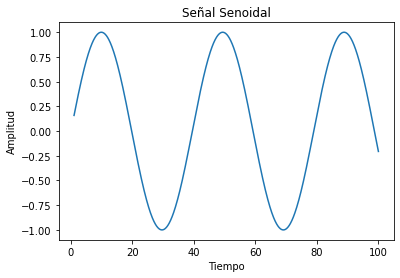

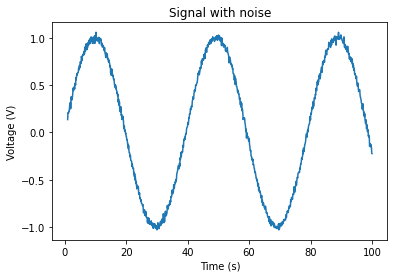

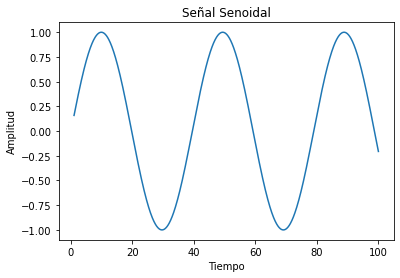

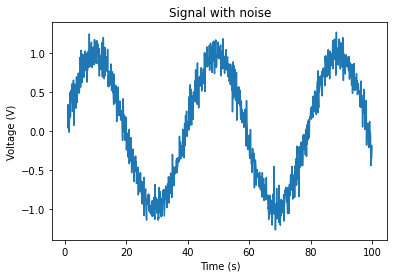

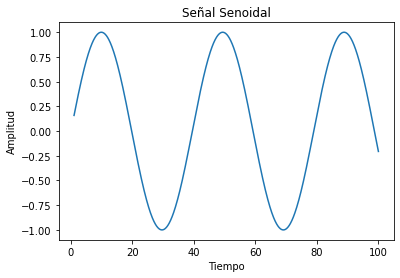

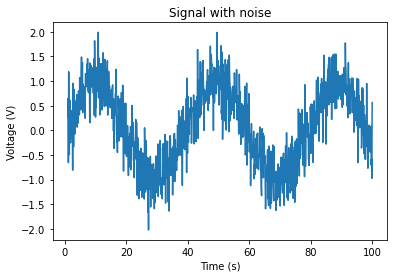

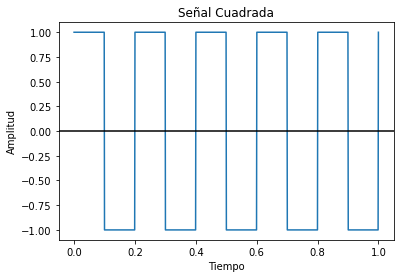

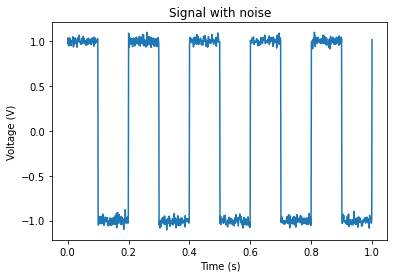

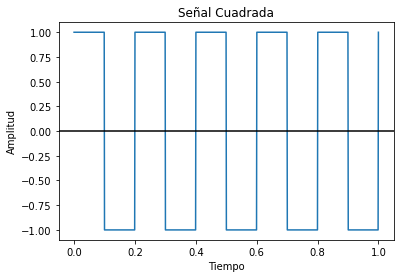

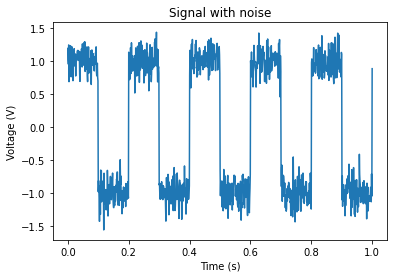

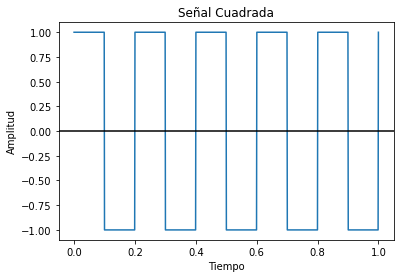

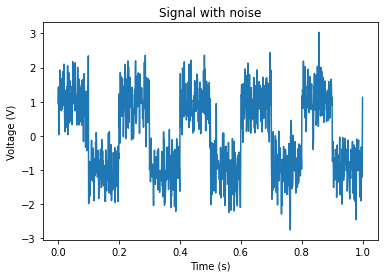

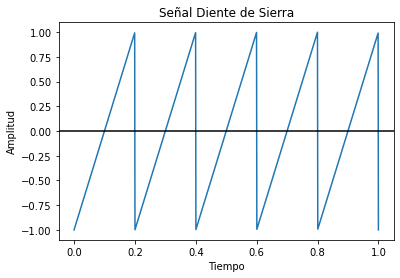

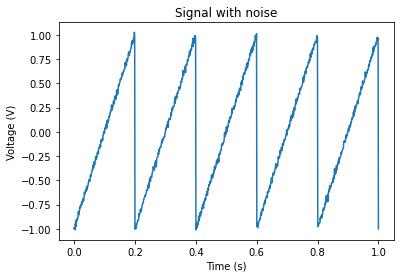

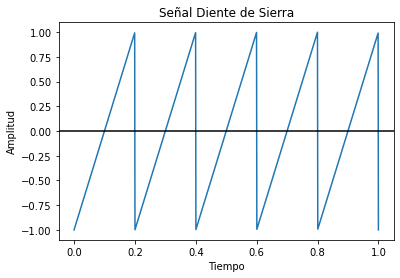

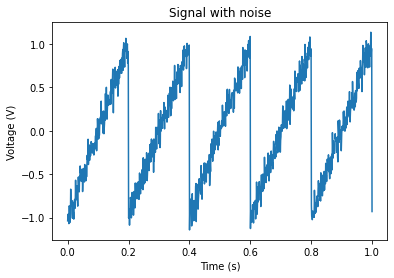

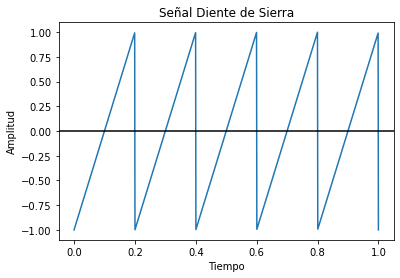

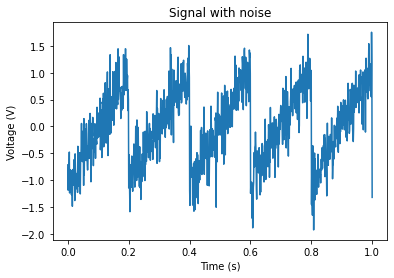

In [29]:
Tarea2(1,1)
Tarea2(1,2)
Tarea2(1,3)

Tarea2(2,1)
Tarea2(2,2)
Tarea2(2,3)

Tarea2(3,1)
Tarea2(3,2)
Tarea2(3,3)


